# **Basics of cluster analysis**

Credits to [365 Data Science](https://www.youtube.com/watch?v=YIGtalP1mv0)


Data [github](https://github.com/timurista/data-analysis/blob/master/python-jupyter/Cluster%20Analysis/3.01.%20Country%20clusters.csv)

### Import the relevant libraries

In [63]:
# import visualization and data wrangling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# import the KMeans algorithms from sklearn.cluster
from sklearn.cluster import KMeans

### Load the data

In [64]:
# read the data
data = pd.read_csv('3.01. Country clusters.csv')

In [65]:
# view the data
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Plot the data

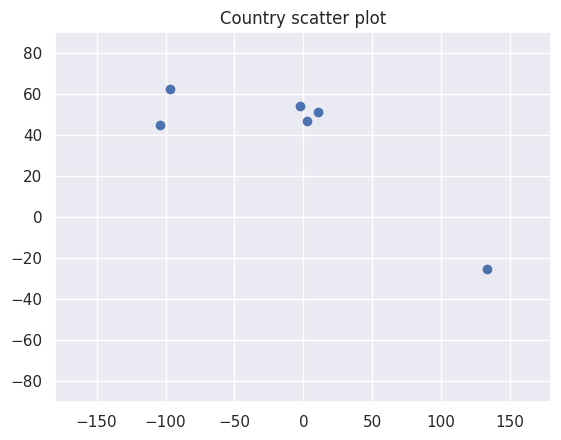

In [66]:
# plot the clusters with the actual latitudes and longitudes
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.title('Country scatter plot')
plt.show();

### Select the features

In [67]:
# start clustering based on location using latitude and longitude
x = data.iloc[:,1:3] # as the features to x

In [68]:
# output x
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


### Clustering

In [69]:
# declare KMeans variable
 # 2 number of clusters we want
kmeans = KMeans(n_clusters=3, n_init='auto')

In [70]:
# fit the variable
kmeans.fit(x)

KMeans(n_clusters=3, n_init='auto')

### Clustering results

In [71]:
# interested in the cluster and predicted value of the algorithm
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [72]:
# new dataFrame with cluster value of each country
data_with_cluster = data.copy()
# new column assigned
data_with_cluster['Cluster'] = identified_clusters
# output the new dataFrame
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


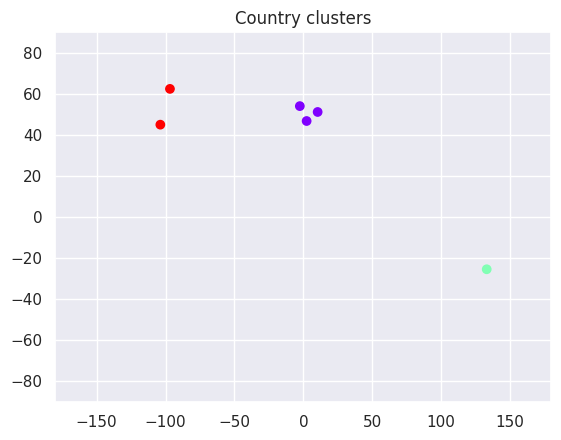

In [73]:
# plot the clusters with the actual latitudes and longitudes
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_cluster['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.title('Country clusters')
plt.show();

### **Silhouette score of our K-Means:**

In [74]:
# import silhouette_score from sklearn
from sklearn.metrics import silhouette_score
# the variable and predicted identified clusters
silhouette_score(x,identified_clusters)

0.7232813961472381

## **Now let's cluster based on language**

In [75]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### using the language feature

In [76]:
# make a copy of the data and assign to the variable data_lang
data_lang = data_with_cluster.copy()
# use the map function to encode the language feature
# Note other more efficient methods sure binarization and one-hot-encoding can be used
data_lang['Language'] = data_lang['Language'].map({'English':0, 'French':1, 'German':2})

In [77]:
data_lang

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,2
1,Canada,62.40,-96.80,0,2
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


#### cluster with language

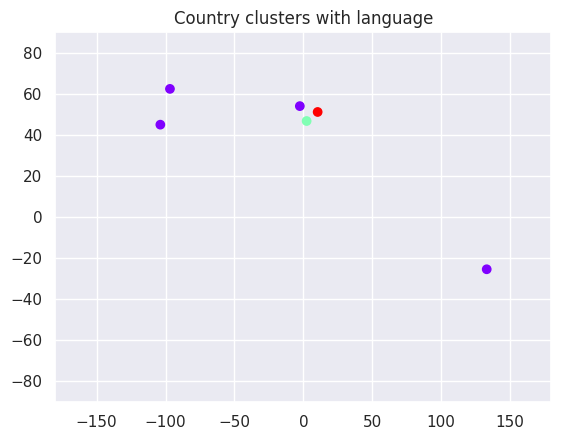

In [78]:
# plot the clusters with the actual latitudes and longitudes
plt.scatter(data_lang['Longitude'], data_lang['Latitude'], c=data_lang['Language'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.title('Country clusters with language')
plt.show();

# **Elbow Method:**

**The elbow method:** is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.<br/>


**WCSS:** is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1.

[WCSS](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FWCSS-a-and-WCSS-gradient-b-of-K-means-clustering-at-given-cluster-numbers_fig4_342705767&psig=AOvVaw2F3lN3SRpOEeaFHZMDbCJj&ust=1689778691849000&source=images&cd=vfe&opi=89978449&ved=0CBEQjRxqFwoTCKjbnqfCmIADFQAAAAAdAAAAABAE)

1. minimizing the distance between points in a cluster(intra).

2. maximizing the distance between clusters(inter).



In [79]:
# use inertia method to allow sklearn to select the optimal cluster for us
kmeans.inertia_

288.10523333333333

In [83]:
# declare an empty list
wcss = []

for i in range (1,7):
  kmeans = KMeans(i,n_init='auto')
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

In [84]:
# output wcss
wcss

[42601.91356666667,
 17243.964500000006,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

#### **Plot the elbow chart:**

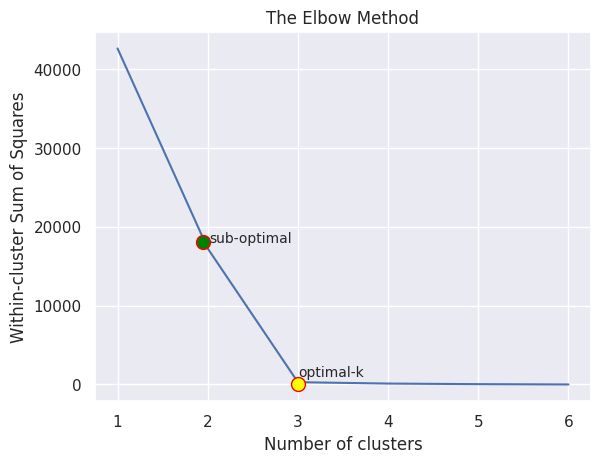

In [120]:
# assing the number of clusters representing the x-axis values
number_cluster = range(1,7)
# plot the number of clusters against wcss
plt.plot(number_cluster,wcss)
plt.plot(1.95,18000, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.text(2.019, 18030, 'sub-optimal', fontsize = 10)
plt.plot(3,0, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="yellow")
plt.text(3.002, 1000, 'optimal-k', fontsize = 10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show();